# Data mining HW2

author: Ali ArjomandBigdeli (Student Number: 9423008)

## Question 1: Apriori diff. FP-Growth

### Apriori:

Apriori employs an iterative approach known as a level-wise search, where k-itemsets are used to explore (k+1)-itemsets. First, the set of frequent 1-itemsets is found by scanning the database to accumulate the count for each item, and collecting those items that satisfy minimum support. The resulting set is denoted by L1. Next, L1 is used to find L2, the set of frequent 2-itemsets, which is used to find L3, and so on, until no more frequent k-itemsets can be found. The finding of each Lk requires one full scan of the database.

To improve the efficiency of the level-wise generation of frequent itemsets, an important property called the Apriori property is used to reduce the search space.
- If there is any itemset which is infrequent, its superset should not be generated/tested.

### FP-Growth:

First, it compresses the database representing frequent items into a frequent pattern tree, or FP-tree, which retains the itemset association information. It then divides the compressed database into a set of conditional databases (a special kind of projected database), each associated with one frequent item or “pattern fragment,” and mines each database separately. For each “pattern fragment,” only its associated data sets need to be examined. Therefore, this approach may substantially reduce the size of the data sets to be searched, along with the “growth” of patterns being examined.

#### Apriori VS. FP-Growth:

Apriori approach
- Breadth-first (i.e., level-wise) search
- Candidate generation and test(Often generates a huge number of candidates)

The FPGrowth Approach
- Depth-first search
- Avoid explicit candidate generation

## Question 2: apply Apriori and FP-Growth to the table of transactions to find all association rules

#### sup_min = 2, conf_min = 0.7

|  TID |  Items  |
|------|-----------------|
|  T1  | A, C, D   |
|------|-----------------|
|  T2  | A, B, C, E |
|------|-----------------|
|  T3  | E, B, C |
|------|-----------------|
|  T4  | B, E |
|------|-----------------|
|  T5  | A, F, B, C |

### Apriori:

**1st scan**

| Itemset |  sup  |    
|---------|-------|
|  {A}    |   3   |
|---------|-------|
|  {B}    |   4   |
|---------|-------|
|  {C}    |   4   |
|---------|-------|
|  {D}    |   <font color='red'>1</font>   |
|---------|-------|
|  {E}    |   2   |
|---------|-------|
|  {F}    |   <font color='red'>1</font>   |


**2nd scan**

| Itemset |  sup  |    
|---------|-------|
|  {A,B}  |   2   |
|---------|-------|
|  {A,C}  |   3   |
|---------|-------|
|  {A,E}  |   <font color='red'>1</font>   |
|---------|-------|
|  {B,C}  |   3   |
|---------|-------|
|  {B,E}  |   3   |
|---------|-------|
|  {C,E}  |   2   |

**3rd scan**

| Itemset |  sup  |    
|---------|-------|
| {A,B,C} |   2   |
|---------|-------|
| {B,C,E} |   2   |

### FP-Growth:

![title](img/FPGrowth.jpg)

### Rules of {A,B,C}:

**AB -> C**

conf = $\frac{2}{2}$ = 1 > 0.7 -> good rule 

lift = $\frac{\frac{2}{5}}{\frac{2}{5} \times \frac{4}{5}} = \frac{5}{4}$ > 1 -> good rule


**AC -> B**

conf = $\frac{2}{3}$ < 0.7


**BC -> A**

conf = $\frac{2}{3}$ < 0.7 


**A -> BC**

conf = $\frac{2}{3}$ < 0.7 

**B -> AC**

conf = $\frac{2}{4}$ < 0.7

### Rules of {B,C,E}:

**BC -> E**

conf = $\frac{2}{3}$ < 0.7


**BE -> C**

conf = $\frac{2}{3}$ < 0.7


**CE -> B**

conf = $\frac{2}{2}$ = 1 > 0.7 -> good rule 

lift = $\frac{\frac{2}{5}}{\frac{2}{5} \times \frac{4}{5}} = \frac{5}{4}$ > 1 -> good rule

### Rules of {A,C}:

**A -> C**

conf = $\frac{3}{3}$ = 1 > 0.7 -> good rule 

lift = $\frac{\frac{3}{5}}{\frac{3}{5} \times \frac{4}{5}} = \frac{5}{4}$ > 1 -> good rule


**C -> A**

conf = $\frac{3}{4}$ = 0.75 > 0.7 -> good rule 

lift = $\frac{\frac{3}{5}}{\frac{4}{5} \times \frac{3}{5}} = \frac{5}{4}$ > 1 -> good rule

### Rules of {A,B}:

**A -> B**

conf = $\frac{2}{3}$ < 0.7


**B -> A**

conf = $\frac{2}{4}$ < 0.7

### Rules of {B,C}:

**B -> C**

conf = $\frac{3}{4}$ = 0.75 > 0.7 -> good rule 

lift = $\frac{\frac{3}{5}}{\frac{4}{5} \times \frac{4}{5}} = \frac{15}{16}$ < 1 -> bad rule


**C -> B**

conf = $\frac{3}{4}$ = 0.75 > 0.7 -> good rule 

lift = $\frac{\frac{3}{5}}{\frac{4}{5} \times \frac{4}{5}} = \frac{15}{16}$ < 1 -> bad rule

### Rules of {B,E}:

**B -> E**

conf = $\frac{3}{4}$ = 0.75 > 0.7 -> good rule 

lift = $\frac{\frac{3}{5}}{\frac{4}{5} \times \frac{2}{5}} = \frac{15}{8}$ > 1 -> good rule


**E -> B**

conf = $\frac{3}{2}$ = 1.5 > 0.7 -> good rule 

lift = $\frac{\frac{3}{5}}{\frac{4}{5} \times \frac{2}{5}} = \frac{15}{8}$ > 1 -> good rule

### Rules of {C,E}:

**C -> E**

conf = $\frac{2}{4}$ < 0.7


**E -> C**

conf = $\frac{2}{2}$ = 1 > 0.7 -> good rule 

lift = $\frac{\frac{2}{5}}{\frac{4}{5} \times \frac{2}{5}} = \frac{5}{4}$ > 1 -> good rule


## Question 3: Apriori VS. FP-Growth time complexity by using weka

I wrote the code in java using weka and save time rusults in 'times.txt' file

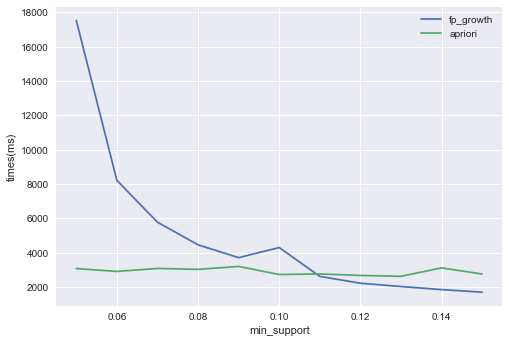

In [2]:
import matplotlib.pyplot as plt
import numpy as np

infile = open('times.txt')
for index, line in enumerate(infile):
    if index == 0:
        min_sup_list = line.rstrip().split(",")
        min_sup_list = np.array(min_sup_list[:-1]).astype(float)
    if index == 1:
        fp_growth_times = line.rstrip().split(",")
        fp_growth_times = np.array(fp_growth_times[:-1]).astype(int)
    if index == 2:
        apriori_times = line.rstrip().split(",")
        apriori_times = np.array(apriori_times[:-1]).astype(int)


plt.style.use("seaborn")
plt.plot(min_sup_list, fp_growth_times, label="fp_growth")
plt.plot(min_sup_list, apriori_times, label="apriori")
plt.xlabel("min_support")
plt.ylabel("times(ms)")
plt.legend()
plt.show()